### 本プログラムは文章を生成する機械学習モデルの学習、文章生成をするものです。
### 利用するコーパスは[BTSJ日本語自然会話コーパス](https://ninjal-usamilab.info/lab/btsj_corpus/)です。
### 同様のプログラムが３つ（BTSJ日本語自然会話コーパスをインプットとした文章生成.ipynb、BTSJ日本語自然会話コーパスをインプットとした文章生成_by_word.ipynb、BTSJ日本語自然会話コーパスをインプットとした文章生成_by_word2vec.ipynb）あり、それぞれOne-hot表現を用いた文字ベースの文章生成と単語ベースの文章生成、Word2Vecを用いた単語ベースの文章生成を行うものになります。 
### ※本コードでは複数のExcelファイルを読み込むように修正してしまい、諸事情によりバージョンを戻しておりませんが、実際のモデルは１ファイルのみでトレーニングしたものです。

### ※なお、他２つのNotebookファイルは本ファイルをベースとしているため、このような説明書きは冒頭に記載しません（コメントで処理の説明をします）。

### 前処理

In [9]:
import datetime
import openpyxl
import glob
import os
import re
import pprint
import math
import numpy as np

# ファイルの一覧を取得
# pprint.pprint(glob.glob("./btsjcorpus_ver2020/3.コーパスのトランスクリプト・音声/**/*.xlsx", recursive=True))

xlsx_file = "./btsjcorpus_ver2020/3.コーパスのトランスクリプト・音声/01. 親しい同性友人同士雑談(男性、女性)【全てがコア会話】/友人同士(男男)/001-01-JM001-JM002.xlsx"

# ファイル名に「JF/JM」を含むファイルのシートを1000行読み込む
# xlsx_files = glob.glob("./btsjcorpus_ver2020/3.コーパスのトランスクリプト・音声/**/*.xlsx", recursive=True)
# xlsx_files = [xlsx_file for xlsx_file in xlsx_files if "JF" or "JM" in xlsx_files]
# xlsx_file = xlsx_files[0]
# print("xlsx_file：" + str(len(xlsx_files)))
# print(np.shape(xlsx_files))

In [2]:
xlsx_file

'./btsjcorpus_ver2020/3.コーパスのトランスクリプト・音声/17. 友人同士討論(異性)【全てが非コア会話】/259-17-JF111-JM039.xlsx'

In [4]:
# dialog_list = []
# now = datetime.datetime.now()

# i = 1

# # xlsx_files_split[2]までmodel.fitのfor文をまわす
# for xlsx_files in xlsx_files_split:
    
#     print(str(i) + "回目の繰り返し")
#     dialog_list.clear()
    
#     for xlsx_file in xlsx_files:
#         # エクセルブック
#         wb = openpyxl.load_workbook(xlsx_file, data_only=True)

#         # エクセルシート
#         ws = wb["Transcription"]

#         # ヘッダーを除いて順番に読み込む
#         for row in ws["H4:H1000"]: 
#             if row[0].value is None:
#                 # print()
#                 break
#             dialog_list.append(row[0].value)
#             dialog = ''.join(dialog_list)

#     # 余計な文字をカット
#     # =:削除, {#}:中の文字ごと削除, <#>:中の文字ごと削除, (#):中の文字ごと削除, [#]:中の文字ごと削除, 【【:削除, 】】:削除
#     # JM or JF + 数字3桁: 削除
#     dialog = re.sub(r'=','',dialog)
#     dialog = re.sub(r'{.+?}','',dialog)
#     dialog = re.sub(r'\[.+?\]','',dialog)
#     dialog = re.sub(r'《.+?》','',dialog)
#     dialog = re.sub(r'\(.+?\)','',dialog)
#     dialog = re.sub(r'<.+?>','',dialog)
#     dialog = re.sub(r'[.+?]','',dialog)
#     dialog = re.sub(r'【【','',dialog)
#     dialog = re.sub(r'】】','',dialog)
#     dialog = re.sub(r'\\u3000','',dialog) 
#     dialog = re.sub(r'JM[0-9]{3}','',dialog)
#     dialog = re.sub(r'JF[0-9]{3}','',dialog)
#     dialog = re.sub(r'。。','。',dialog)
#     dialog = re.sub(r'。、','',dialog)

#     # 分割個数分のdialog.txtを作成
#     f = open('dialog' + str(i) + '.txt', 'w', encoding="utf-8")
#     f.write(dialog)

#     i += 1

1回目の繰り返し
2回目の繰り返し
3回目の繰り返し


In [11]:
dialog_list = []
now = datetime.datetime.now()

wb = openpyxl.load_workbook(xlsx_file, data_only=True)

# エクセルシート
ws = wb["Transcription"]

# ヘッダーを除いて順番に読み込む
for row in ws["H4:H1000"]: 
    if row[0].value is None:
        # print()
        break
    dialog_list.append(row[0].value)
    dialog = ''.join(dialog_list)

# 余計な文字をカット
# =:削除, {#}:中の文字ごと削除, <#>:中の文字ごと削除, (#):中の文字ごと削除, [#]:中の文字ごと削除, 【【:削除, 】】:削除
# JM or JF + 数字3桁: 削除
dialog = re.sub(r'=','',dialog)
dialog = re.sub(r'{.+?}','',dialog)
dialog = re.sub(r'\[.+?\]','',dialog)
dialog = re.sub(r'《.+?》','',dialog)
dialog = re.sub(r'\(.+?\)','',dialog)
dialog = re.sub(r'<.+?>','',dialog)
dialog = re.sub(r'[.+?]','',dialog)
dialog = re.sub(r'【【','',dialog)
dialog = re.sub(r'】】','',dialog)
dialog = re.sub(r'\\u3000','',dialog) 
dialog = re.sub(r'JM[0-9]{3}','',dialog)
dialog = re.sub(r'JF[0-9]{3}','',dialog)
dialog = re.sub(r'。。','。',dialog)
dialog = re.sub(r'。、','',dialog)

# 分割個数分のdialog.txtを作成
f = open('dialog(1file).txt', 'w', encoding="utf-8")
f.write(dialog)

10512

In [12]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import matplotlib.pyplot as plt
import random
import sys
import io
%matplotlib inline

# 保存したコーパスの読み込み
path = './dialog(1file).txt'
with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
print('corpus length:', len(text))

# 順引き、逆引き辞書の作成
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# maxlenずつ次の１語を予測
# stepずつ時間軸をスライドしていく
maxlen = 8
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

Using TensorFlow backend.
corpus length: 10512
total chars: 515
nb sequences: 10504


### モデルの構築

In [13]:
# One-hot表現でベクトル化
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.uint8)
y = np.zeros((len(sentences), len(chars)), dtype=np.uint8)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
 
# シンプルなLSTMと層を重ねたLSTMも試す（ベストエフォート）
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
 
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
 
 # 多項分布から確率的に次の１語を選ぶ処理
def sample(preds, temperature=1.0):
    # 確率を格納した配列からサンプリングする
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Vectorization...
Build model...


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               1069056   
_________________________________________________________________
dense_1 (Dense)              (None, 1959)              252711    
_________________________________________________________________
activation_1 (Activation)    (None, 1959)              0         
Total params: 1,321,767
Trainable params: 1,321,767
Non-trainable params: 0
_________________________________________________________________


### １エポック毎に文章を生成する関数をKeras Callbackとして設定

In [14]:
def on_epoch_end(epoch, logs):
    # 各エポック終了時に発火し、そのエポック時点の学習モデルで生成した文章を表示する
    print()
    print('----- Generating text after Epoch: %d' % epoch)
 
    start_index = random.randint(0, len(text) - maxlen - 1)
    start_index = 0  # 毎回、文章の最初から文章生成
    for diversity in [0.2]:  # diversityが大きくなるにつれ、確率分布から確率の低い文字をサンプリングするようになる
        print('----- diversity:', diversity)
 
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)
 
        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
 
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
 
            generated += next_char
            sentence = sentence[1:] + next_char
 
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
 
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

### 学習とlossの推移の確認

In [15]:
history = model.fit(x, y,
                    batch_size=128,
                    epochs=60,
                    callbacks=[print_callback])

# Plot Training loss 
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss" )
plt.title("Training loss")
plt.legend()
plt.savefig("loss.png")
plt.close()

ああのー、ほんとも嫌もっとからや、そういうのしては、からしくんない。もう、ほっとできこっちが、ある程度の近「苗字」ちゃんまいいから。いやんじょ。あの、「人名6あだ名」は、あたりはちょっと強いけど、うん、フレンドリー、フレンドリー。あ、ちが、ちゃ、ちゃ、あとまとまだけて。ちゃ、、10、1発言がうんま会話かよ。みんな。ちゃう、だから、1してり最わー、“分から、て。きてー、ー、おれは。あれが「苗字」ちゃんは、全部やっちゃうんだ。じゃ、この、こういうシナリオ的にはさ、お、言われれたもん、あってこなんだも。ね。。それ、。ちょう、あのねー、“あー、あ、2くなかなっからいい。い、よ。しかもんからおにしてるからねー、みたいな気テだったね。。あん。確かに、あのねー、あの、
Epoch 28/60
10504/10504 [==============================] - 3s 314us/step - loss: 0.1145

----- Generating text after Epoch: 27
----- diversity: 0.2
----- Generating with seed: "さっそく見てみよ"
さっそく見てみようか。ちがう。まだよくないまだいいよ。早いおれ、おれねー、ここねー、初めてきたんだよ。うん。これ、何が見える。あんねー、とりあえず努力家っていうのはベースに、あってー、でもー、あのねー、と、めんどくさい、みんなにね、“みんなでやっていこうぜ”っていうとがあるかなー、。ちゃう、だからだかんなんでー、ちょっと、ちょっと、あいつはすごいがんばり屋さんだよ。あ、そうなん。あのねー、ま、確かに開幕に間に合えばいいのかも知らんけど。いや、疲れたからねー。“みんなでやっていこうぜ”っていうとがあるかなー、。ちゃう、だからだかんだよ。それね、みんなでね、“決めてこうぜ”っていうとがあるかなー、。ちゃう、だからだかんだよ。それね、みんなでね、“決めてこうぜ”っていうとがあるかなー、。ちゃう、だからだかんだよ。それね、みんなでね、“決めてこうぜ”っていうとがあるかなー、。ちゃう、だからだかんだよ。それね、みん
Epoch 29/60
10504/10504 [==============================] - 3s 323us/step

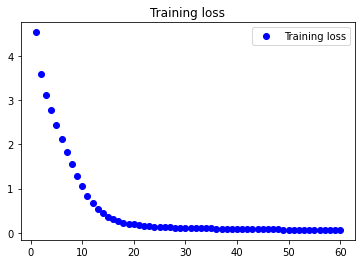

In [16]:
# 損失の推移
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss" )
plt.title("Training loss")
plt.legend()
plt.show()
plt.savefig("loss.png")
plt.close()

### モデルの保存

In [17]:
# モデルと学習結果（パラメータ）の保存
json_string = model.to_json()
open('dialog_model.json', 'w').write(json_string)
model.save('dialog_model.h5')